In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')
churn_data.head(200)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,1,1,600.36,0
196,197,15635905,Moran,616,Spain,Female,32,6,0.00,2,1,1,43001.46,0
197,198,15777892,Samsonova,721,Germany,Male,37,3,107720.64,1,1,1,158591.12,0
198,199,15656176,Jenkins,501,France,Male,57,10,0.00,2,1,1,47847.19,0


In [68]:
churn_data = churn_data.drop('RowNumber', axis = 1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


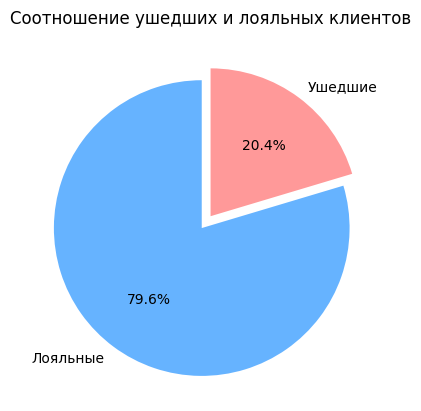

In [14]:
# Считаем количество ушедших и лояльных клиентов
loyal_count = churn_data[churn_data['Exited'] == 0].shape[0]
churned_count = churn_data[churn_data['Exited'] == 1].shape[0]

# Создаем график
labels = ['Лояльные', 'Ушедшие']
sizes = [loyal_count, churned_count]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # выделение сегмента "Лояльные"

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)


# Добавляем заголовок
plt.title('Соотношение ушедших и лояльных клиентов')

# Отображаем график
plt.show()

Из графика видно, что колличество ушедших клиентов превышает 20% от общего числа всех клиентов. 

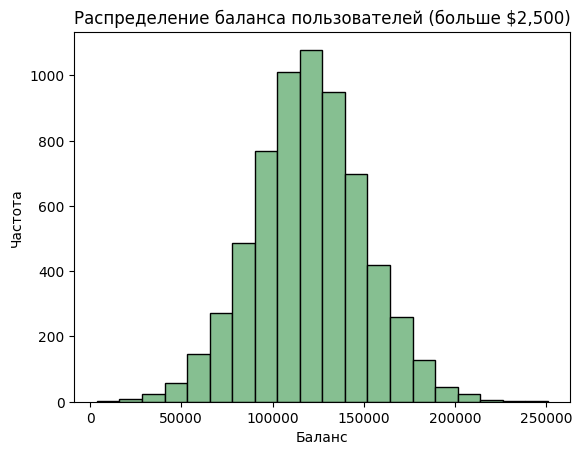

In [15]:
# Выбираем пользователей с балансом больше 2,500 долларов
filtered_data = churn_data[churn_data['Balance'] > 2500]

# Создаем график распределения
plt.hist(filtered_data['Balance'], bins=20, color='#86bf91', edgecolor='black')

# Добавляем заголовок и метки осей
plt.title('Распределение баланса пользователей (больше $2,500)')
plt.xlabel('Баланс')
plt.ylabel('Частота')

# Отображаем график
plt.show()

На графике отчеливо видно, что пользователи с балансом больше 2500$, чаще всего имеют баланс от 100,000$ до 150,000$. Наименьшее колличество обозначенных пользователей имеют баланс ниже 50,000$ и свыше 200,000$

/var/folders/mj/6p8qfrq97ts_vlb1kk914kjc0000gn/T/ipykernel_54801/3226804815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=churn_data, palette='Set2')


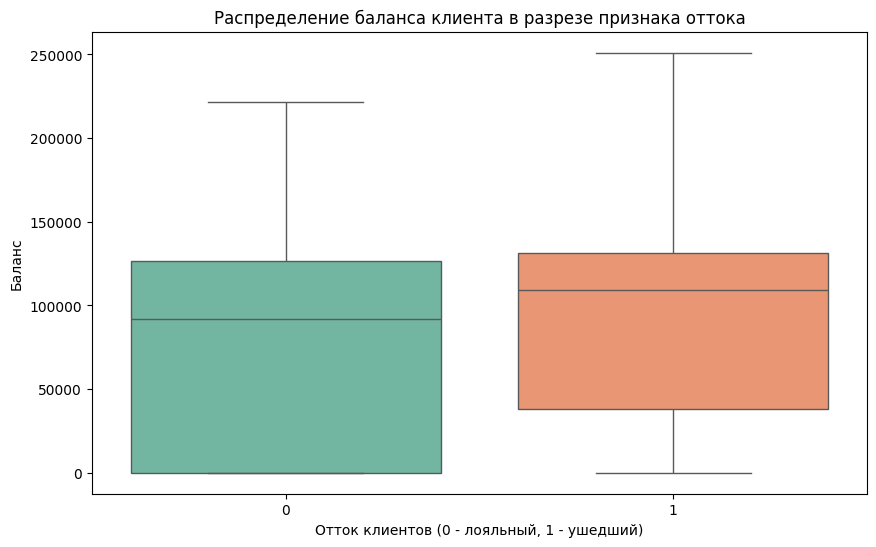

In [26]:
# Создаем коробочную диаграмму для сравнения баланса ушедших и лояльных клиентов
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=churn_data, palette='Set2')

# Добавляем заголовок и метки осей
plt.title('Распределение баланса клиента в разрезе признака оттока')
plt.xlabel('Отток клиентов (0 - лояльный, 1 - ушедший)')
plt.ylabel('Баланс')

# Отображаем график
plt.show()

Из графика видно, что медианное значение и разброс баланса у ушедших клиентов выше, чем у лояльных. Возможно, клиенты уходят в банк с более привлекательными условями по вкладам, так как при высоком балансе даже не намного более выгодные условия становятся значительно ощутимее для клиента. Стоит провести детальное сравнение условий с конкурирующими банками по аналогичным продуктам.
Также среди лояльных клиентов есть пользователи с нулевым балансом. Нужно провести более детальный анализ по таким клиентам.


/var/folders/mj/6p8qfrq97ts_vlb1kk914kjc0000gn/T/ipykernel_54801/1031791765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=churn_data, palette='Set2')


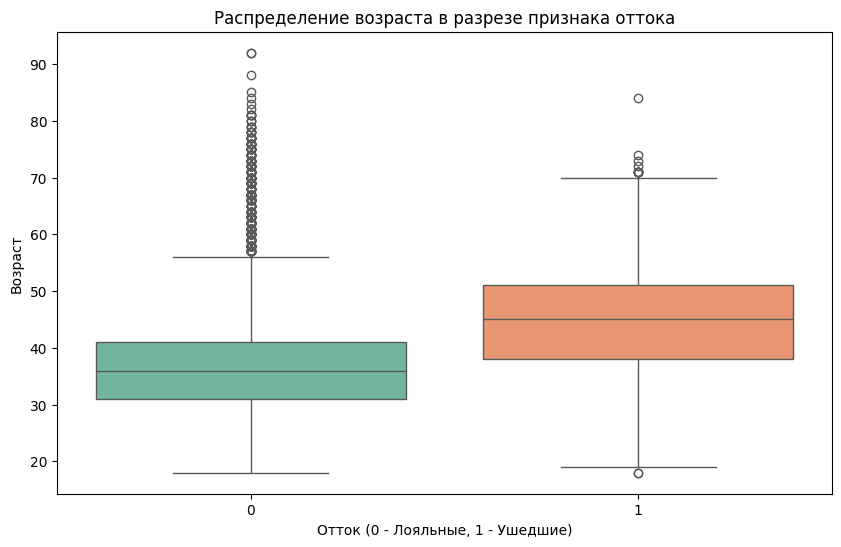

In [37]:
# Создаем ящик с усами для сравнения возраста ушедших и лояльных клиентов
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=churn_data, palette='Set2')

# Добавляем заголовок и метки осей
plt.title('Распределение возраста в разрезе признака оттока')
plt.xlabel('Отток (0 - Лояльные, 1 - Ушедшие)')
plt.ylabel('Возраст')

# Отображаем график
plt.show()

На графике лояльных клиентов большое колличество выбросов (клиентов старше 55 лет).
Исходя из двух графиков, стоит обратить внимание на клиентов с возрастом старше 40 лет, так как их наибольшее колличество среди ушедших.
Возможно, это связано с накоплением средств и уходом к конкурентам с более выгодными условиями. Также стоит обратить внимание на выбросы, нужно детальнее изучить лояльных клиентов старше 55 лет.

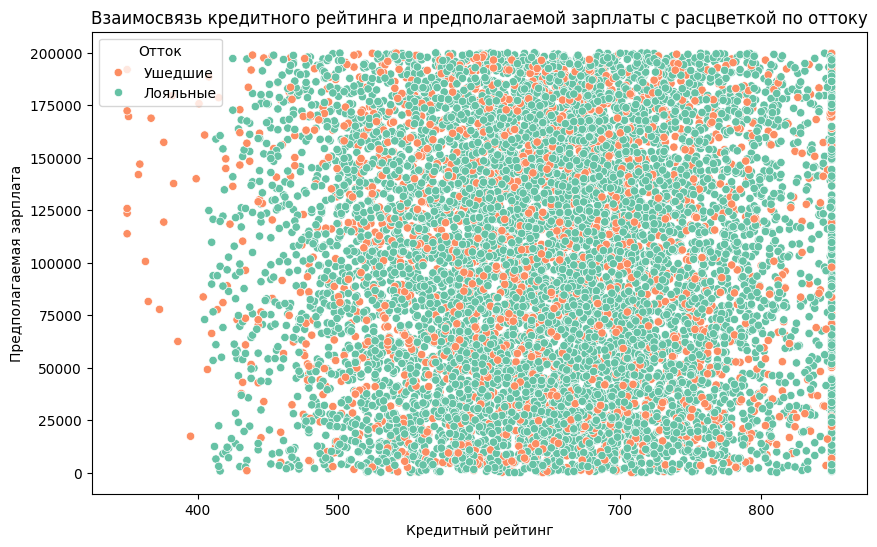

In [50]:
# Создаем график рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', hue='Exited', data=churn_data, palette='Set2')

# Добавляем легенду
plt.legend(title='Отток', labels=['Ушедшие', 'Лояльные'])

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты с расцветкой по оттоку')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')

# Отображаем график
plt.show()

Лояльные клиенты имеют кредитный рейтинг минимум выше 400. Другой зависимости на графике не наблюдается, так как и лояльные и ушедшие клиенты встречаются на всем диапозоне взаимосвязи кредитного рейтинга и преполагаемой зарплаты. Можно сделать вывод, что клиенты с плохой кредитной историей не получают в банке кредит и покидают его как клиенты.

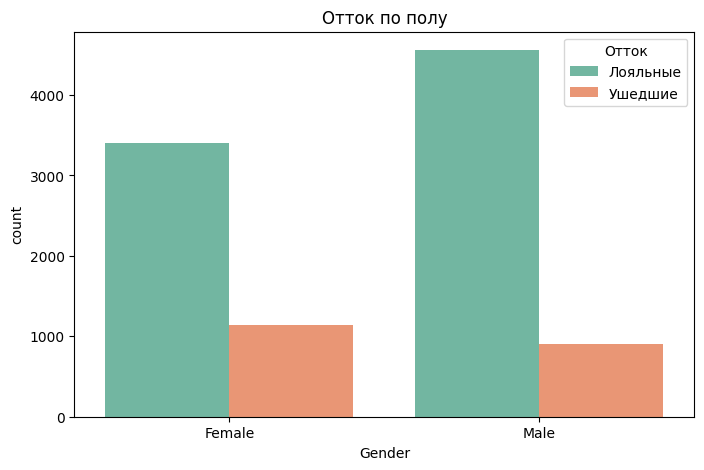

In [53]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=churn_data, palette='Set2')

# Добавляем легенду
plt.legend(title='Отток', labels=['Лояльные', 'Ушедшие'])

# Добавляем заголовок и метки осей
plt.title('Отток по полу')

# Отображаем график
plt.show()

Колличество ушедших женщин выше как относительно ушедших мужчин, так и относительно лояльных женщин внутри группы по полу. 

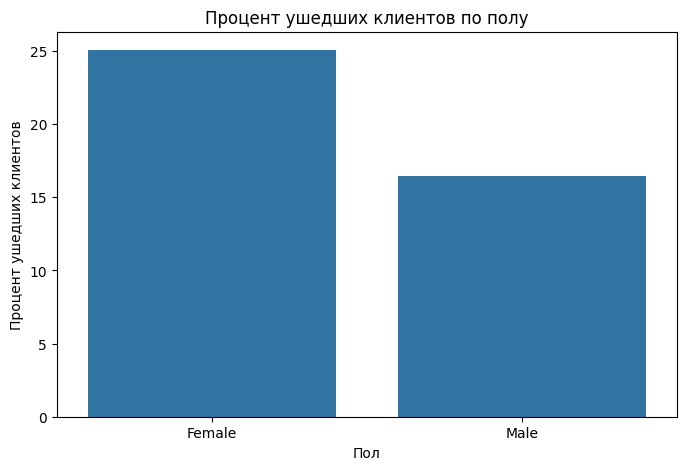

In [56]:
percentage_churn_by_gender = churn_data.groupby('Gender')['Exited'].mean() * 100

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 5))
sns.barplot(x=percentage_churn_by_gender.index, y=percentage_churn_by_gender.values)

# Добавляем заголовок и метки осей
plt.title('Процент ушедших клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Процент ушедших клиентов')

# Отображаем график
plt.show()

На этом графике более детально показано соотношение между ушедшими клиентами в зависимости от пола

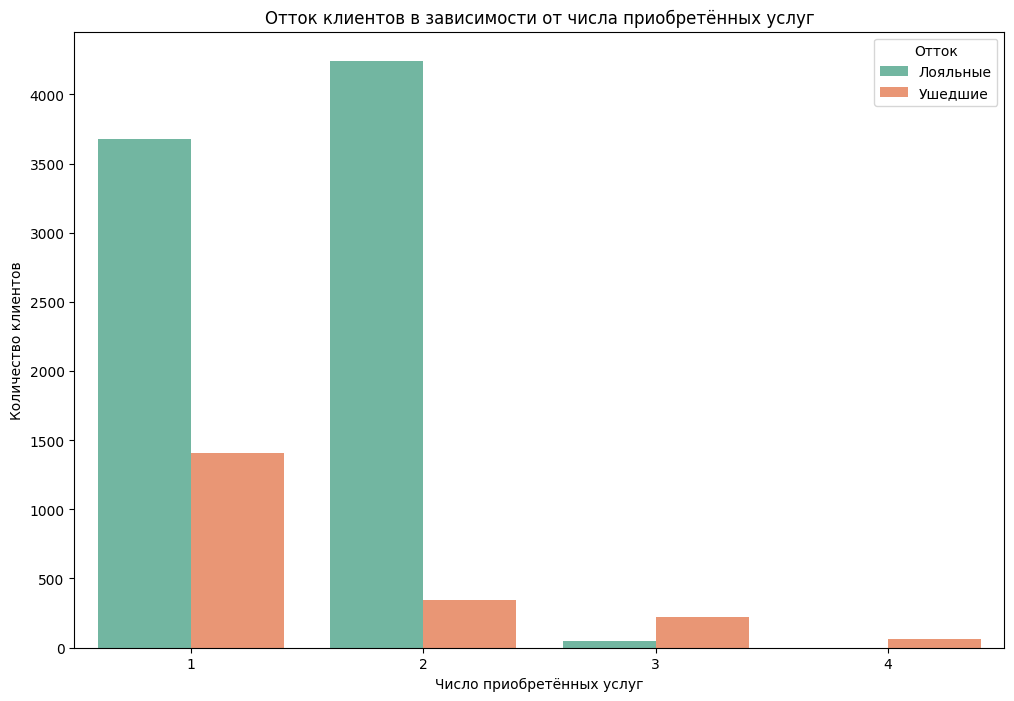

In [57]:
# Создаем многоуровневую столбчатую диаграмму
plt.figure(figsize=(12, 8))
sns.countplot(x='NumOfProducts', hue='Exited', data=churn_data, palette='Set2')

# Добавляем легенду
plt.legend(title='Отток', labels=['Лояльные', 'Ушедшие'])

# Добавляем заголовок и метки осей
plt.title('Отток клиентов в зависимости от числа приобретённых услуг')
plt.xlabel('Число приобретённых услуг')
plt.ylabel('Количество клиентов')

# Отображаем график
plt.show()

Достаточно интересный график. Мы видим, что наибольшее колличество клиентов покидают банк после первой же услуги, и с увеличением покупаемых услуг таких клиентов все меньше. Но также вы видим, что лояльные клиенты приобретают всего 1 или 2 продукта. Исходя из графика я бы сделал вывод, что большое колличество клиентов уходит от банка при покупке первого же продукта, а лояльные клиенты не хотят приобретать больше 2х продуктов.

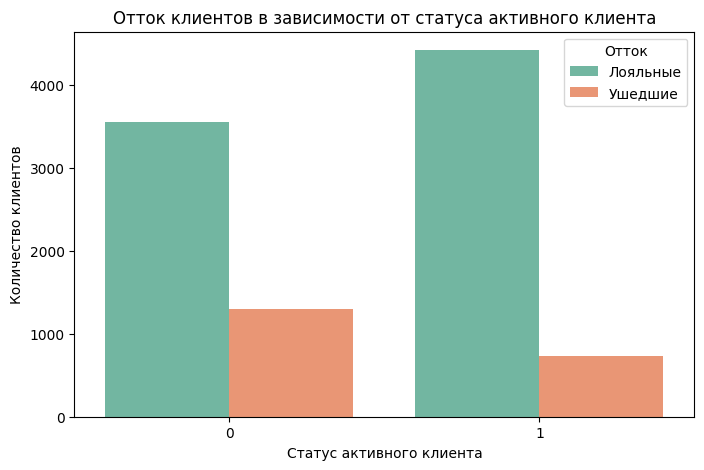

In [60]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 5))
sns.countplot(x='IsActiveMember', hue='Exited', data=churn_data, palette='Set2')

# Добавляем легенду
plt.legend(title='Отток', labels=['Лояльные', 'Ушедшие'])

# Добавляем заголовок и метки осей
plt.title('Отток клиентов в зависимости от статуса активного клиента')
plt.xlabel('Статус активного клиента')
plt.ylabel('Количество клиентов')


# Отображаем график
plt.show()

Показатель ушедших активных пользователей ниже чем у неактивных. Банку следует проявить внимание к неактивным клиентам с дальнейшей попыткой перевести их в категорию активных, возможно, предложить свои продукты по акционным условиям исходя из условий продуктов других банков.

In [73]:
# Рассчитываем процент оттока для каждой страны
country_churn_data = churn_data.groupby('Geography')['Exited'].mean().reset_index()

# Загружаем датасет стран из Plotly Express
world = px.data.gapminder()

# Объединяем данные по странам с географическими данными
merged_data = pd.merge(world, country_churn_data, left_on='country', right_on='Geography', how='left')

# Рассчитываем процент ушедших в процентах
merged_data['Exited_percent'] = merged_data['Exited'] * 100

# Создаем тепловую карту с использованием Plotly Express
fig = px.choropleth(merged_data, 
                    locations='iso_alpha',
                    color='Exited_percent',
                    color_continuous_scale='viridis',
                    hover_name='country',
                    title='Процент ушедших клиентов по странам')

# Обновляем размеры всего графика
fig.update_layout(geo=dict(projection_type="natural earth"), width=1200, height=800)

# Отображаем карту
fig.show()


Процент ушедших клиентов выше в Германии. Это может быть связано с высокой конкурентностью среди банков в данной стране.

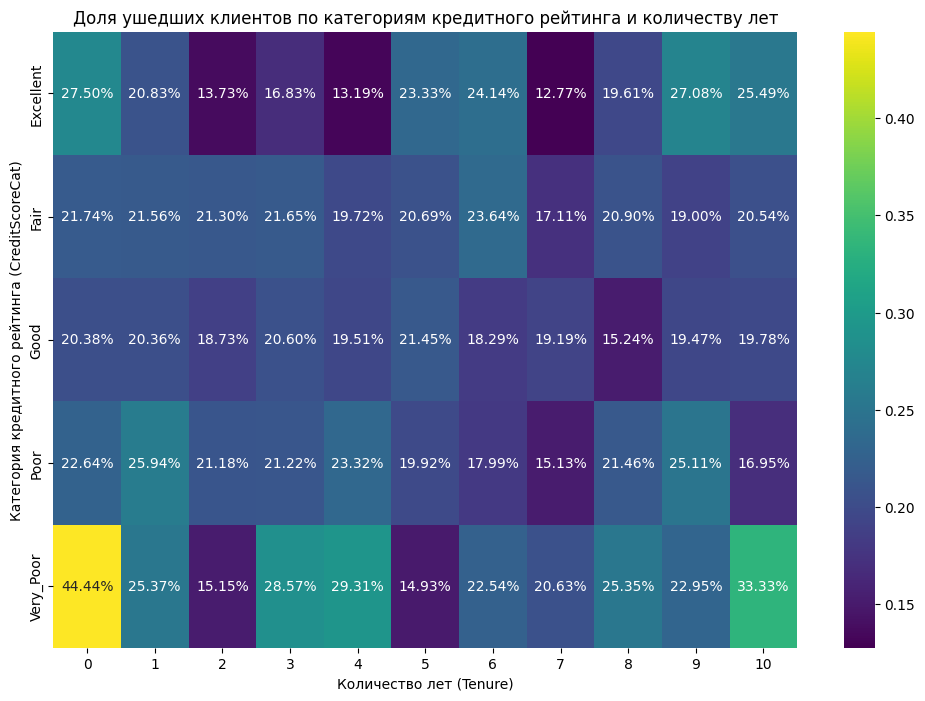

In [77]:
# Определение функции для преобразования числового признака в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Применение функции к столбцу CreditScore и создание нового признака CreditScoreCat
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Построение сводной таблицы
pivot_table = pd.pivot_table(churn_data, values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')

# Построение тепловой карты с аннотацией
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.2%')

plt.title('Доля ушедших клиентов по категориям кредитного рейтинга и количеству лет')
plt.xlabel('Количество лет (Tenure)')
plt.ylabel('Категория кредитного рейтинга (CreditScoreCat)')

plt.show()

Наивысшая доля ушедших клиентов приходится на новых клиентов с очень плохой кредитной историей. Также высокий процент по ушедшим клиентам наиболее часто встречается среди клиентов в первый год обслуживания банка и с 10 летним стажем обслуживания. Особенно хорошо это видно среди клиентов с плохим и отлчичным кредитным рейтингом.